In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("../data/integrated.csv")
df

,year,precipitation,count,fatalities,injuries,majinjury,mininjury,possinjury,unkinjury,propdmg
0,2014,4.35,3017,19,1191,88,379,682,42,19511105
1,2015,4.18,3986,23,1606,71,460,966,109,26318128
2,2016,6.12,2679,7,1013,46,277,611,79,17648125
3,2017,2.31,3047,9,1190,69,327,692,102,20706389
4,2018,8.10,3389,12,1260,51,357,743,109,22543154
5,2019,6.21,3093,18,1244,66,355,728,95,21840047
6,2020,4.07,2276,17,845,47,232,472,94,17328310
7,2021,1.81,2383,11,975,41,299,539,96,19965911
8,2022,1.90,2359,13,914,62,285,469,98,20642149
9,2023,2.14,2012,11,765,37,263,383,82,18308339


In [37]:
corr = df.corr()
corr

,year,precipitation,count,fatalities,injuries,majinjury,mininjury,possinjury,unkinjury,propdmg
year,1.000000,-0.581428,-0.821086,-0.427525,-0.808222,-0.762615,-0.766828,-0.835254,0.047444,-0.546172
precipitation,-0.581428,1.000000,0.634567,0.241331,0.571552,0.286600,0.489709,0.609446,0.213480,0.424792
count,-0.821086,0.634567,1.000000,0.570968,0.992888,0.715334,0.951649,0.991708,0.423034,0.905953
fatalities,-0.427525,0.241331,0.570968,1.000000,0.603702,0.627030,0.654575,0.574760,0.059815,0.594290
injuries,-0.808222,0.571552,0.992888,0.603702,1.000000,0.735634,0.970531,0.994062,0.410455,0.922063
majinjury,-0.762615,0.286600,0.715334,0.627030,0.735634,1.000000,0.773701,0.704619,-0.075906,0.609599
mininjury,-0.766828,0.489709,0.951649,0.654575,0.970531,0.773701,1.000000,0.945315,0.302123,0.927888
possinjury,-0.835254,0.609446,0.991708,0.574760,0.994062,0.704619,0.945315,1.000000,0.395074,0.884755
unkinjury,0.047444,0.213480,0.423034,0.059815,0.410455,-0.075906,0.302123,0.395074,1.000000,0.610805
propdmg,-0.546172,0.424792,0.905953,0.594290,0.922063,0.609599,0.927888,0.884755,0.610805,1.000000


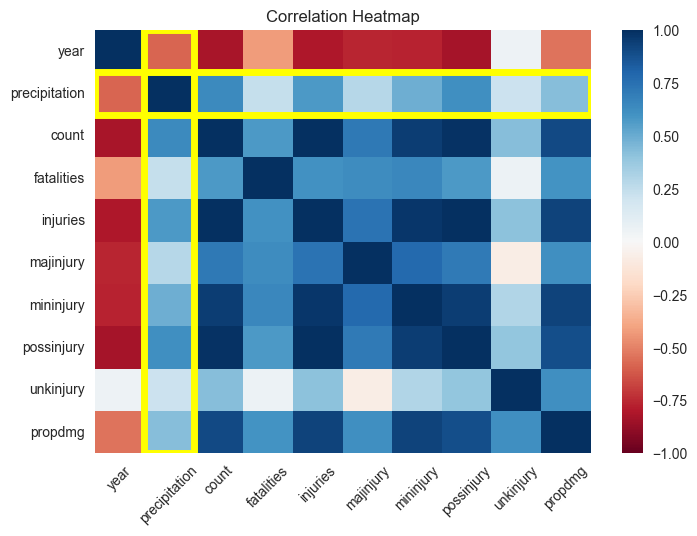

In [46]:
import matplotlib.patches as patches
fig, ax = plt.subplots()
sns.heatmap(corr, ax=ax, vmin=-1, vmax=1, cmap='RdBu')
rect1 = patches.Rectangle((1, 0), width=1, height=corr.shape[0], fill=False, edgecolor="yellow", linewidth=5)
rect2 = patches.Rectangle((0, 1), width=corr.shape[1], height=1, fill=False, edgecolor="yellow", linewidth=5)
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.xticks(rotation=45)


plt.title("Correlation Heatmap")
plt.savefig("../results/heatmap.png", bbox_inches='tight')

In [39]:
corr['precipitation']

year            -0.581428
precipitation    1.000000
count            0.634567
fatalities       0.241331
injuries         0.571552
majinjury        0.286600
mininjury        0.489709
possinjury       0.609446
unkinjury        0.213480
propdmg          0.424792
Name: precipitation, dtype: float64

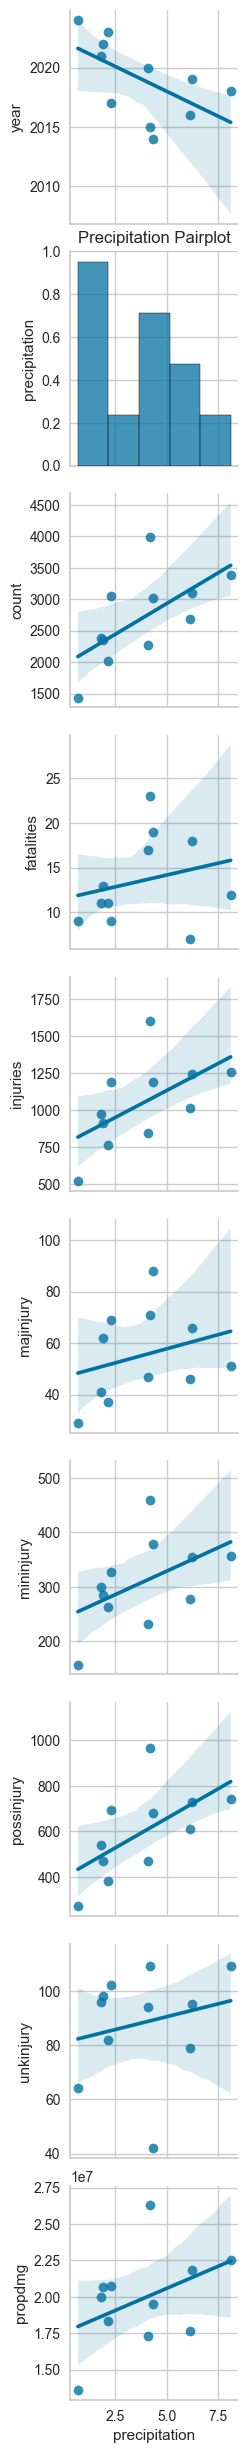

In [40]:
sns.pairplot(x_vars=["precipitation"], y_vars=df.columns, data=df, kind='reg')
plt.title("Precipitation Pairplot")
plt.savefig("../results/pairplot.png", bbox_inches='tight')

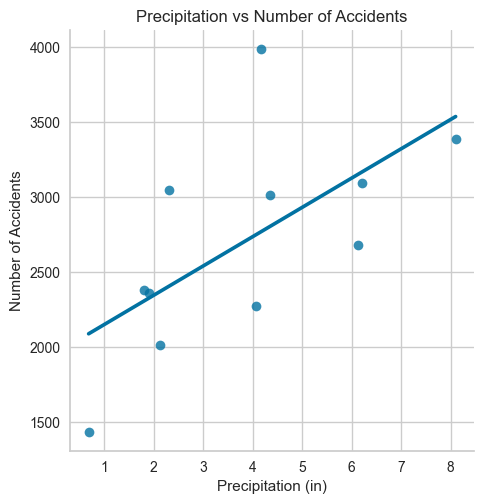

In [41]:
sns.lmplot(x='precipitation',y='count',data=df, ci=False)
plt.xlabel("Precipitation (in)")
plt.ylabel("Number of Accidents")
plt.title("Precipitation vs Number of Accidents")
plt.savefig("../results/lmplot.png", bbox_inches='tight')

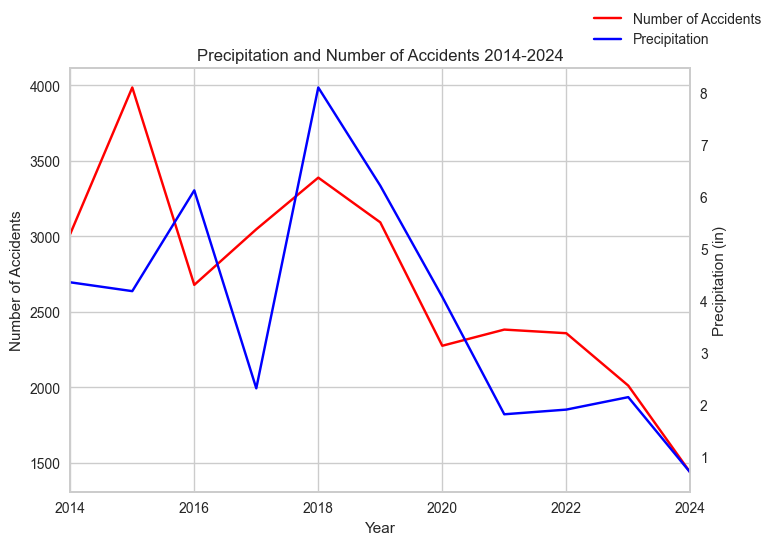

In [42]:
fig, ax1 = plt.subplots()

ax1.plot(df['year'], df['count'], label="Number of Accidents", color='red')
ax1.set_xlabel("Year")
plt.xlim(2014, 2024)
ax1.set_ylabel("Number of Accidents")
ax1.set_title("Precipitation and Number of Accidents 2014-2024")
# ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(df['year'], df['precipitation'], label="Precipitation", color='blue')
ax2.set_ylabel("Precipitation (in)")
ax2.grid(False)
fig.legend()

fig.savefig("../results/lineplot.png", bbox_inches='tight')

In [43]:
from pycaret import regression

regression.setup(data=df[["precipitation", "count"]], target='count', session_id=123, fold_strategy='kfold', fold=3)
best_model = regression.compare_models(include=['lr', 'ridge', 'lasso', 'en', 'huber'])

,Description,Value
0,Session id,123
1,Target,count
2,Target type,Regression
3,Original data shape,"(11, 2)"
4,Transformed data shape,"(11, 2)"
5,Transformed train set shape,"(7, 2)"
6,Transformed test set shape,"(4, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,682.5620,654101.7413,777.5708,-0.4852,0.2923,0.2683,0.3333
ridge,Ridge Regression,695.1843,680654.9693,796.4304,-0.5765,0.2887,0.2660,0.3333
lasso,Lasso Regression,707.9970,728761.6294,826.0721,-0.7237,0.2881,0.2636,0.3333
lr,Linear Regression,708.2047,729636.7283,826.5871,-0.7265,0.2881,0.2635,0.9067
huber,Huber Regressor,824.3108,997278.5739,988.4547,-1.7009,0.3473,0.3004,0.3333


In [44]:
best_model.coef_

array([200.10318], dtype=float32)

In [45]:
best_model.intercept_

1930.2559

$\widehat{count}$ $=$ $200.10318$ $*$ $precipitation$ $+$ $1930.2559$